In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/Nazrin99/GoldPricePredict/main/FINAL_USO.csv')

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [3]:
X = df[['SP_Ajclose', 'DJ_Ajclose', 'EG_Ajclose', 'GDX_Adj Close', 'USO_Adj Close']]
y = df['Adj Close']

In [4]:
X

,SP_Ajclose,DJ_Ajclose,EG_Ajclose,GDX_Adj Close,USO_Adj Close
0,105.441238,11868.80957,70.431755,48.973877,36.130001
1,105.597549,11866.38965,72.364037,49.921513,36.270000
2,104.468536,11766.25977,62.509384,48.490578,36.200001
3,107.629784,12103.58008,64.731514,50.215282,37.560001
4,107.838242,12107.74023,66.180725,50.186852,38.110001
...,...,...,...,...,...
1713,234.339996,21792.19922,2.950000,21.090000,9.290000
1714,246.179993,22878.44922,3.000000,20.620001,9.900000
1715,248.070007,23138.82031,2.950000,20.969999,9.620000
1716,247.750000,23062.40039,2.900000,20.600000,9.530000


In [5]:
y

0       152.330002
1       155.229996
2       154.869995
3       156.979996
4       157.160004
           ...    
1713    120.019997
1714    119.660004
1715    120.570000
1716    121.059998
1717    121.250000
Name: Adj Close, Length: 1718, dtype: float64

<Axes: >

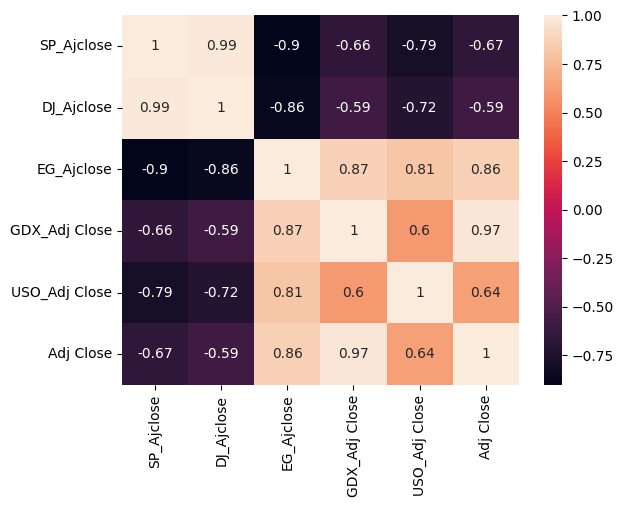

In [6]:
correlation_matrix = X.join(y).corr()

sns.heatmap(correlation_matrix, annot=True)

In [7]:
train_size = int(y.shape[0] * 0.8)

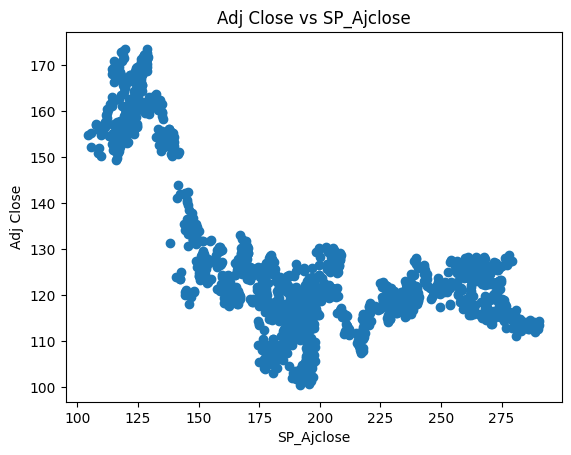

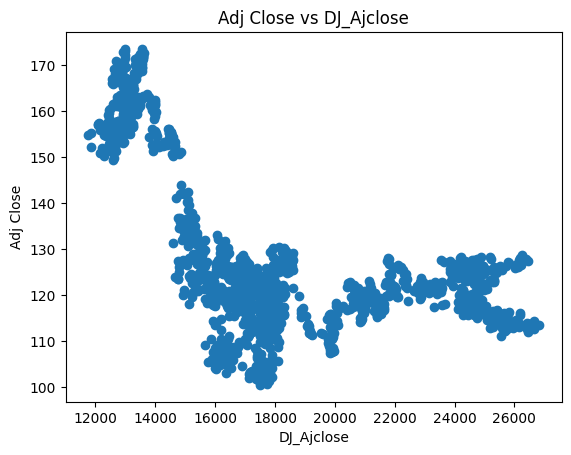

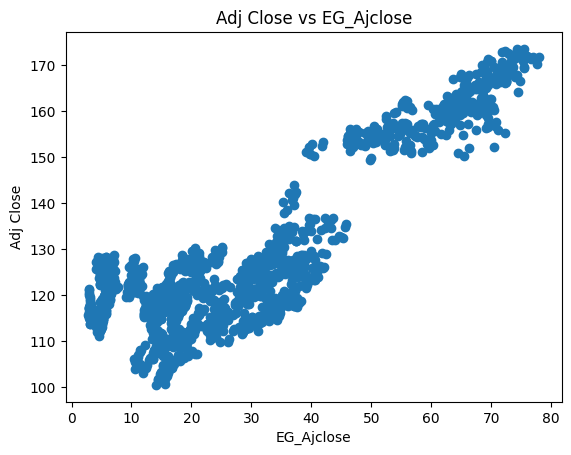

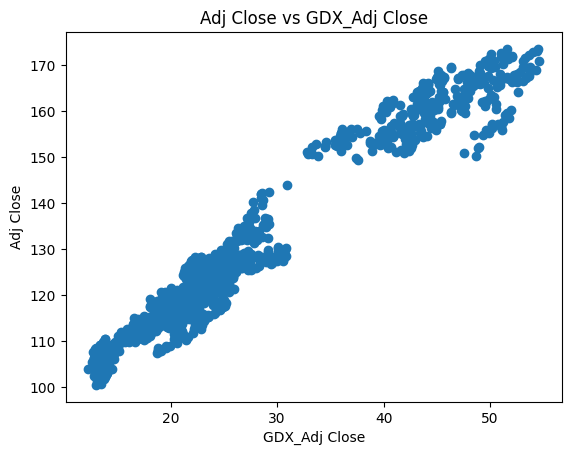

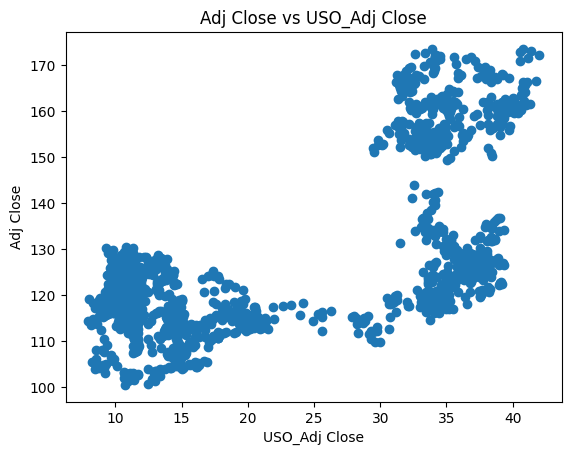

In [11]:
plt.scatter(df['SP_Ajclose'], df['Adj Close'])
plt.title("Adj Close vs SP_Ajclose")
plt.ylabel("Adj Close")
plt.xlabel("SP_Ajclose")
plt.show()

plt.scatter(df['DJ_Ajclose'], df['Adj Close'])
plt.title("Adj Close vs DJ_Ajclose")
plt.ylabel("Adj Close")
plt.xlabel("DJ_Ajclose")
plt.show()

plt.scatter(df['EG_Ajclose'], df['Adj Close'])
plt.title("Adj Close vs EG_Ajclose")
plt.ylabel("Adj Close")
plt.xlabel("EG_Ajclose")
plt.show()

plt.scatter(df['GDX_Adj Close'], df['Adj Close'])
plt.title("Adj Close vs GDX_Adj Close")
plt.ylabel("Adj Close")
plt.xlabel("GDX_Adj Close")
plt.show()

plt.scatter(df['USO_Adj Close'], df['Adj Close'])
plt.title("Adj Close vs USO_Adj Close")
plt.ylabel("Adj Close")
plt.xlabel("USO_Adj Close")
plt.show()

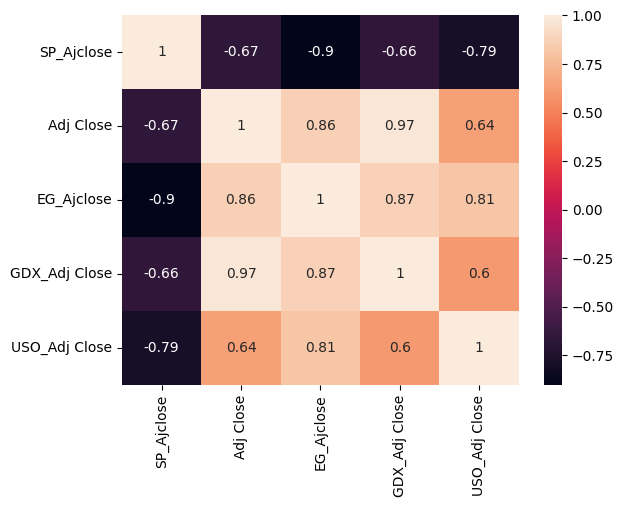

In [16]:
sns.heatmap(df[['SP_Ajclose', 'Adj Close', 'EG_Ajclose', 'GDX_Adj Close', 'USO_Adj Close']].corr(), annot=True)
plt.show()

In [17]:
x_train = X.values[:train_size, ]
x_test = X.values[train_size:,]
y_train = y.values[:train_size,]
y_test = y.values[train_size:,]

In [18]:
x_train_normalized = pd.DataFrame((x_train - x_train.mean()) / x_train.std())
x_test_normalized = pd.DataFrame((x_test - x_test.mean()) / x_train.std())

In [19]:
x_train_normalized.insert(0, 'bias', 1)
x_test_normalized.insert(0, 'bias', 1)

In [20]:
x_train_normalized

,bias,0,1,2,3,4
0,1,-0.487262,1.270047,-0.492492,-0.495697,-0.497616
1,1,-0.487239,1.269686,-0.492203,-0.495556,-0.497595
2,1,-0.487407,1.254728,-0.493675,-0.495770,-0.497606
3,1,-0.486935,1.305119,-0.493343,-0.495512,-0.497403
4,1,-0.486904,1.305741,-0.493127,-0.495516,-0.497320
...,...,...,...,...,...,...
1369,1,-0.467105,2.797393,-0.501647,-0.499723,-0.501500
1370,1,-0.467038,2.801219,-0.501572,-0.499741,-0.501505
1371,1,-0.467127,2.796277,-0.501594,-0.499734,-0.501511
1372,1,-0.467128,2.790803,-0.501579,-0.499682,-0.501497


In [21]:
x_train_array = x_train_normalized.values
x_test_array = x_test_normalized.values
y_train_array = y_train
y_test_array = y_test

In [22]:
y_test_array.shape

(344,)

In [23]:
theta = np.zeros(x_train_array.shape[1])

In [24]:
theta.shape

(6,)

In [25]:
theta

array([0., 0., 0., 0., 0., 0.])

In [26]:
def mean_squared_error_cost(x, y, theta):
  predictions = np.dot(x, theta)
  mse = np.mean((predictions - y) ** 2)
  return mse

In [27]:
def gradient_descent(x, y, theta, learning_rate, num_iterations):
  m = len(y)
  costs = []

  for i in range(num_iterations):
    predictions = np.dot(x, theta)
    error = predictions - y
    gradient = (1 / m) * np.dot(x.T, error)
    theta = theta - learning_rate * gradient

    cost = mean_squared_error_cost(x, y, theta)
    costs.append(cost)

  return theta, costs


In [28]:
learning_rate = 0.01
num_iterations = 1000

theta, costs = gradient_descent(x_train_array, y_train_array, theta, learning_rate, num_iterations)

In [29]:
y_train_pred = np.dot(x_train_array, theta)
y_test_pred = np.dot(x_test_array, theta)

In [30]:
train_r2 = r2_score(y_train_array, y_train_pred)
test_r2 = r2_score(y_test_array, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train_array, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_array, y_test_pred))

In [31]:
y_test_array.shape

(344,)

In [32]:
y_test_pred.shape

(344,)

In [33]:
y_train_array.shape

(1374,)

In [34]:
y_train_pred.shape

(1374,)

In [39]:

print('Training RMSE:', train_rmse)
print('Testing RMSE:', test_rmse)

Training RMSE: 23.09126135758126
Testing RMSE: 42.20407860630504


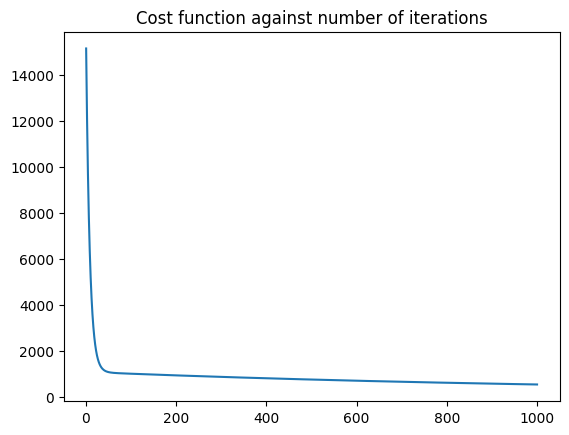

In [38]:
plt.plot([i+1 for i in range(1000)], costs)
plt.title("Cost function against number of iterations")
plt.show()

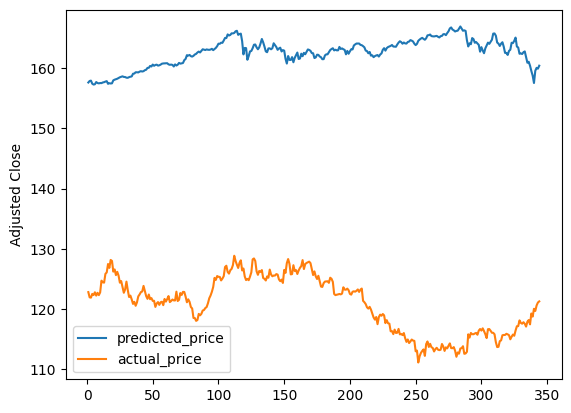

In [37]:
plt.plot([i+1 for i in range(x_test.shape[0])],y_test_pred)
plt.plot([i+1 for i in range(x_test.shape[0])],y_test)
plt.ylabel("Adjusted Close")
plt.legend(['predicted_price', 'actual_price'])
plt.show()